In [447]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [448]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from cpyment import CModel

In [449]:
cm = CModel('SIR')
cm.set_coupling_rate('S*I', 0.3, 'beta')
cm.set_coupling_rate('I:I=>R', 0.1, 'gamma')

In [470]:
y0 = np.array([0.9, 0.1, 0])
dydt = cm.diff(y0)
d2ydtdC = cm.diff_gradient(y0, np.zeros(6,))

dbeta = 0.4
cm1 = CModel('SIR')
cm1.set_coupling_rate('S*I', 0.3+dbeta, 'beta')
cm1.set_coupling_rate('I:I=>R', 0.1, 'gamma')

dydt1 = cm1.diff(y0)

In [471]:
print(dydt1)
print(dydt+dbeta*d2ydtdC[:3])

[-0.063  0.053  0.01 ]
[-0.063  0.053  0.01 ]


In [451]:
y0 = np.array([0.9, 0.1, 0])
trange = np.linspace(0, 100, 1000)

def ode(y, t):
    return cm.diff(y)

traj = odeint(ode, y0, trange)

<IPython.core.display.Javascript object>


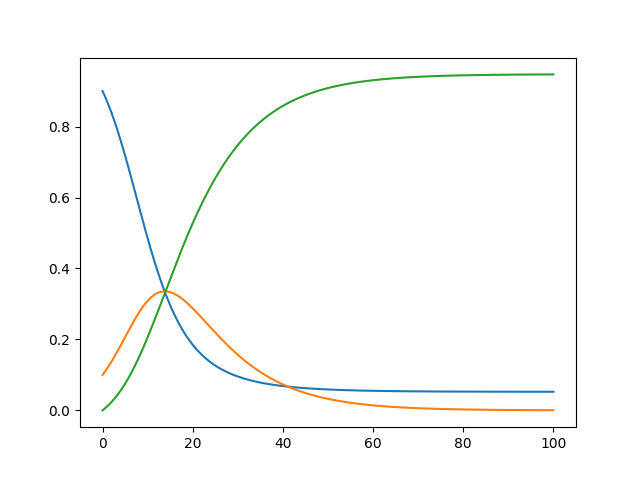

In [452]:
fig, ax = plt.subplots()

ax.plot(trange, traj)

In [271]:
a = np.random.random((3,4,4))
b = np.random.random((1,3))

In [270]:
np.tensordot(b, a, axes=(1,0))

array([[[0.06237746, 0.30243198, 0.40094349, 0.12569525],
        [0.42549061, 0.49480774, 0.09713747, 0.09346717],
        [0.39991843, 0.57356919, 0.93653221, 0.89633661],
        [0.76811696, 0.30292305, 0.20925725, 0.85833016]]])

In [283]:
dyD0 = np.zeros(3)
dyD1 = np.zeros((3,3))
dyD2 = np.zeros((3,3,3))

In [398]:
np.concatenate([np.reshape(range(1,7), (-1,3)), np.zeros((2,1))], axis=1).reshape(-1)

array([1., 2., 3., 0., 4., 5., 6., 0.])

In [288]:
cm._D1

array([[ 0. ,  0. ,  0. ],
       [ 0. , -0.1,  0. ],
       [ 0. ,  0.1,  0. ]])

In [336]:
a = np.array([1,2,3])
i = [0,1,0, 0]
np.add.at(a, i, a[i])

In [337]:
a

array([4, 4, 3])